# TP3 - Frequency Domain
ATRIM - Option Datasim

Ecole Centrale Nantes

Diana Mateus

Participants: CHAITANYA KRISHNA V

## 0. Preparation 

### 0.1 Import the required modules


In [56]:
%matplotlib nbagg
%matplotlib inline

import scipy.ndimage as nd
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io as io
from skimage.transform import resize
from skimage.morphology import disk

### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook.

In [44]:
IMDIR = '/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive'

### 0.2 Read and display the images
Check that you can read and display all the provided images. Do not include this cell, the code nor its ouput in the final report

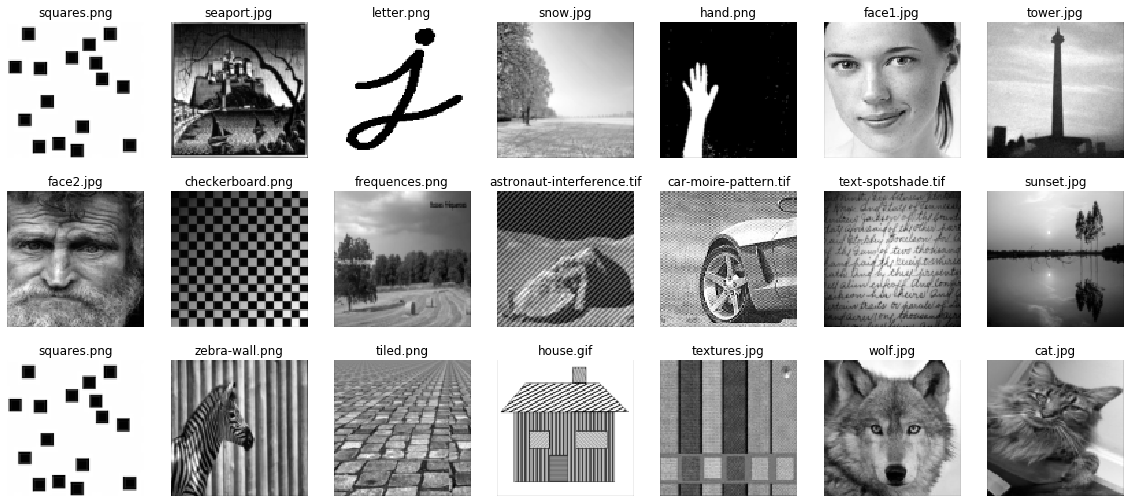

In [46]:


width=20
height=15
plt.rcParams['figure.figsize'] = [width, height]
            
fig=plt.figure()


im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    #print('Hi')
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # print the paths to current filename if nothing is being found
            # print(filename)
            
            # read the image 
            im = io.imread(f,as_gray=True)
            im = resize(im,(100,100),mode='constant')

            # display it
            plt.subplot(5,7,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 


plt.show()

## 1. The Discrete Fourier Transform



### 1.1 Computing and visualizing the DFT  


In this exercise we will compute and visualize a DFT using numpy's fft functions:
- ```np.fft.fft2```: computes the two-dimensional FFT of an image.
- ```np.fft.fftshift```: center the frecuencies in the middle of the image
- ```np.fft.ifftshift```: reverses the centering
- ```np.fft.ifft2```: inverse fourier transform
- ```np.real```: takes the real components of a complex number
- ```np.abs```: recovers the magnitude of a complex number
- ```np.angle```: recovers the phase of a complex number 
- ```np.log```: computes the logarithm

Apply the functions above to the images in the ```Fourier``` folder. Display in a single row for each image:

**a)** the original image 

**b)** the magnitude of its fft (scaled logarithmically)

**c)** the magnitude of its **centered(shifted)** fft (scaled logarithmically)

**c)** the inverse fft of the above transformed image (all the steps shouls be reversed)

**d) For each image explain how the information in the image relates to its representation in the frequency domain**


EXPLANATION**: (FILL IN WITH YOUR ANSWER)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/Fourier/squares.png


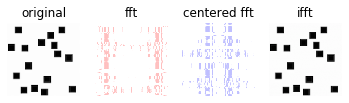

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/Fourier/zebra-wall.png


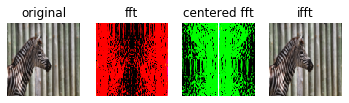

/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/Fourier/tiled.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


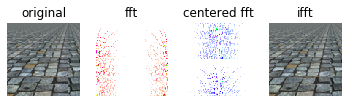

/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/Fourier/house.gif


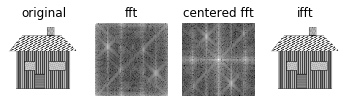

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/Fourier/textures.jpg


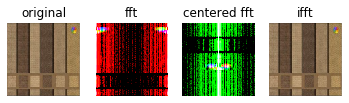

In [86]:
SUBDIR = os.path.join(IMDIR, "Fourier")

for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            plt.subplot(141)
            im = io.imread(f,as_grey=True)
            im = resize(im,(100,100))
            plt.imshow(im,cmap='gray')
            plt.title('original')
            plt.axis('off')
            
            plt.subplot(142)
            im_fft=np.fft.fft2(im)
            im_fftlog=np.log(np.abs(im_fft))
            plt.imshow(im_fftlog,cmap='gray')
            plt.title('fft')
            plt.axis('off')
            
            plt.subplot(143)
            x=np.fft.fftshift(im_fft)
            im_fftcen=np.log(np.abs(x))
            plt.imshow(im_fftcen,cmap='gray')
            plt.title('centered fft')
            plt.axis('off')
            
            plt.subplot(144)
            im_fftdecen=np.fft.ifftshift(x)
            im_ifft=np.fft.ifft2(im_fftdecen)
            plt.imshow(np.abs(im_ifft),cmap='gray')
            plt.title('ifft')
            plt.axis('off')
            plt.show()
#No.1: In fft image only in vertical axis there are values,so there is variation in horizontal direction.
#No.2: In fft image only in horizontal axis there are values, so there is variation in vertical direction.
#No.3: In fft image there is much more high frequency information, so this image may have noise.
#No.4: In fft image the information mainly in →，↑，↙，↘ direction，so it has information in ↑，←，↘，↙ direction
#No.5: It has much more high frequency, but looks like regular.
#No.6: In x and y direction it varies frequently, the image varies a lot in y and direction.
#No.7；It varies frequently in x-axis and in fft image it has value on vertical axis. And there is also a little variance around horizontal
#      direction, so in fft it shows a line around horizontal axis.
#No.8: In the image the bakground varies frequently in horizontal direction, so it shows a vertical line on the fft image. The stripes of 
#      zebra also varies in some directions, so it shows a set of lines in the similar directions. 

## 2. Filtering in the frequency domain
**a)** Implement two functions that create a low pass and a high-pass filter frequency space for a given cutoff frequency $D_0$. The functions receive as input parameter the type of filter: 'ideal' or 'gaussian', and the filter parameters.

**b)** Show the filter frequency responses for different values of the cuttoff frequency both for the gaussian and the ideal filters. 

**c)** Filter **ONE** of the images in the ```freqfilt``` folder with the implemented functions. 

**d)** For the image in c) Show the results of the low and high pass filters  both in the frequency and the space domain.

**e)** Show and compare the results from the ideal and the Gaussian filter. 
**Question**: Are there any observable differences? (write answers in the ANSWERS block below)

**f)** **Question**: What happens with the DC component after a highpass filter has been applied?

**g)** Design and apply the right filter to do the following tasks:
- remove the noise of ```tower.jpg```
- smooth out the freckles of trying to keep the face sharp ```face1.jpg```
- remove out the moire pattern from  ```car-moire-pattern.tif```
- highlight the wrinkles of ```face2.jpg```
- remove the interference pattern of ```astronaut-interference.tif```
- remove the shadow from the ```text-spotshade.tif```

**Explain** the filter choice, show the spatial and frequency response and comment your findings.


**ANSWERS** FILL TEXT ANSWERS to questions e), f) and g) here

**e)**  The standard temporal/spatial Gaussian is a low-pass filter. The standard temporal/spatial Gaussian is a low-pass filter. It replaces every element of the input signal with a weighted average of its neighborhood. This causes blurring in time/space, which is the same as attenuating high-frequency components in the frequency domain

**f)** The DC offset is just the average of all the samples. DC (0Hz) offsets itself.



**g)** Low pass Filter is used to remove the noise from rgz image. It smoothenes the image and is employed to remove high spatial frequency noise from a digital image. The frequency response is given by the Fourier Transform. The low pass filter us  typically used to resuce the noise effects and to remove the spatial high frequency content of the image before sub sampling.



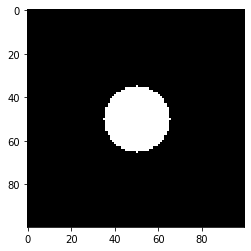

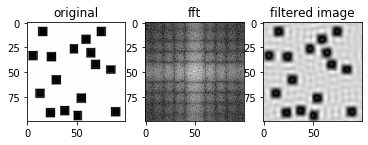

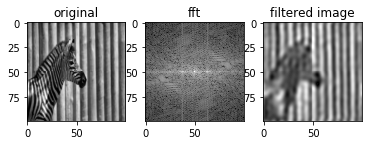

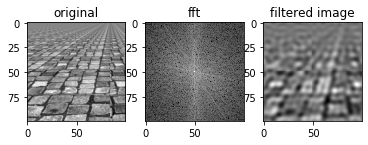

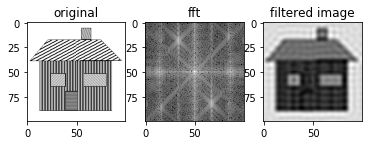

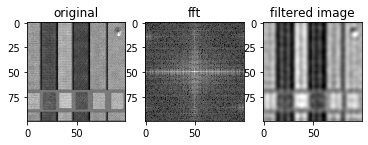

In [51]:
def rgb2gray(input_im):
    r,g,b=input_im[:,:,0],input_im[:,:,1],input_im[:,:,2]
    gray=0.3086*r+0.6094*g+0.0820*b
    return gray

s=15
SUBDIR = os.path.join(IMDIR, "Fourier")
filt=np.zeros((100,100))
selem=disk(s)
filt[50-s:50+s+1,50-s:50+s+1]=selem
plt.imshow(filt,cmap='gray')
plt.show()
for root, dirnames, filenames in os.walk(SUBDIR):
    #print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            im = io.imread(f,as_grey=True)
            im = resize(im,(100,100))
            if len(im.shape)>2:
                im=rgb2gray(im)
            plt.subplot(131)
            plt.imshow(im,cmap='gray')
            plt.title('original')
            im_fft = np.fft.fft2(im)
            x = np.fft.fftshift(im_fft)
            y = np.log(np.abs(x))
            plt.subplot(132)
            plt.imshow(y,cmap='gray')
            plt.title('fft')
            #filtering
            im_filtered=filt*x
            im_decen=np.fft.ifftshift(im_filtered)
            im_ifft=np.fft.ifft2(im_decen)
            plt.subplot(133)
            plt.imshow(np.abs(im_ifft),cmap='gray')
            plt.title('filtered image')
            plt.show()          

##  3. Towards JPEG Compression

**Introduction**

One of the crucial steps of JPEG Compression is the quantization in frequency space. The procedure follows the next steps:

**i)** An image is first subdivided in 8x8 subblocks (assuming the original image has sides whose length is a multiple of 8, if it is not the case just resize it).

**ii)** A frequency transformation is computed for each block (computed with a discrete cosine transform DCT II )
```
fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')
```
**iii)** The DCT results are then divided by the elements of a predefined quantization matrix, then rounded and stored as integers. **Hint:** use functions  ```round()```, ```astype(np.int32)```

**iv)** The result of quantization (which should have many zeros) is then compressed Run Lenght Coding and Huffman coding to reduce the size. The compressed values are saved together with the quantization table.

**v)** The reconstruction of the image implies inverting the encoding, the quantization and the dct.

See more info in this video.
https://www.youtube.com/watch?v=Q2aEzeMDHMA



**What to implement**

In this part you will reproduce the steps regarding the DCT from the JPEG compression procedure, that is steps i) to iii). Pick a grayscale image of your choice, resize it if necessary.

**a)** Compute the frequency quantization step, using the provided ```quantization_table``` and ``dct_2d`` functions.

**b)** Restore the image from its quantized frequency representation.

**e)** Show the frequency spectrum  before and after the quantization.

**d)** Show:
- the original image
- the quantized image 
- the difference between the two.

**f)** Comment your findings. 

ANSWER: DCT coefficient will be divided to quantization arrays elementwise, the higher value on quantization array will cause higher compression to image. 


Block Splitting is important step which splices the image into smaller blocks of 8*8. 


Quality Depends on the Quantisation Matrix used also

**g)** Repeat the above steps but resizing the input image to 128,128 first. What do you observe ?

ANSWER: We observe that by resizing the image to 128 * 128, we have 256 * 8 * 8 blocks; 

Now, knowing that the computation complexity for the 2-dimensional DCT operation is O(N^4) and O((N log2N)^2) considering the Fast Cosine Transform, we still have 1284^4 >> (128xlog2128)^2 >> 1024 x (8xlog28 )^2 which proves that its advisable to split and perform the operations.

**g)** Replace the given DCT function by your own basis implementation. Explain any difference.

ANSWER: Own DCT function is not so optimised, better to use numpy version for both time and space complexity

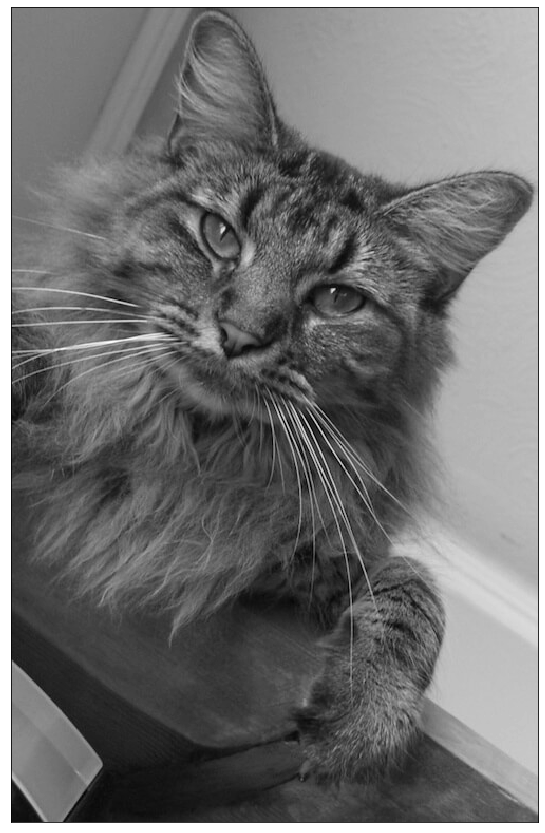

In [107]:
import numpy as np 
import pandas as pd 
import cv2
from matplotlib import pyplot as plt
import os


def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(img,cmap='gray')
    plt.xticks([]),plt.yticks([])
    #plt.title('Original Cat Image but in Gray Scale')
    plt.show()
    
    
img = cv2.imread('/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/PhaseMag/cat.jpg',0)
showImage(img)

In [111]:
def selectQMatrix(qName):
    qlum = np.array([[2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 4, 5, 7, 9],
                      [2, 2, 2, 4, 5, 7, 9, 12],
                      [3, 3, 4, 5, 8, 10, 12, 12],
                      [4, 4, 5, 7, 10, 12, 12, 12],
                      [5, 5, 7, 9, 12, 12, 12, 12],
                      [6, 6, 9, 12, 12, 12, 12, 12]])
    qchrom = np.array([[3, 3, 5, 9, 13, 15, 15, 15],
                      [3, 4, 6, 11, 14, 12, 12, 12],
                      [5, 6, 9, 14, 12, 12, 12, 12],
                      [9, 11, 14, 12, 12, 12, 12, 12],
                      [13, 14, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12]])
    
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    elif qName == 'lum':
        return qlum
    elif qName == 'chrom':
        return qchrom
    else:
        return np.ones((8,8)) # supposed to return original image back

def plot_comparison(original, filtered):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax1.set_adjustable('box')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title('Reconstructed')
    ax2.axis('off')
    ax2.set_adjustable('box')

In [99]:
height  = len(img) #one column of image
width = len(img[0]) # one row of image
sliced = [] # new list for 8x8 sliced image 
block = 8
print("The image heigh is " +str(height)+", and image width is "+str(width)+" pixels")

#dividing 8x8 parts
currY = 0 #current Y index
for i in range(block,height+1,block):
    currX = 0 #current X index
    for j in range(block,width+1,block):
        sliced.append(img[currY:i,currX:j]-np.ones((8,8))*128) #Extracting 128 from all pixels
        currX = j
    currY = i
    
print("Size of the sliced image: "+str(len(sliced)))
print("Each elemend of sliced list contains a "+ str(sliced[0].shape)+ " element.")

The image heigh is 773, and image width is 500 pixels
Size of the sliced image: 5952
Each elemend of sliced list contains a (8, 8) element.


In [100]:
imf = [np.float32(img) for img in sliced]
DCToutput = []
for part in imf:
    currDCT = cv2.dct(part)
    DCToutput.append(currDCT)
DCToutput[0][0]

array([-3.9000000e+01,  3.8440980e-02, -1.9038019e+00, -2.9759650e+00,
        0.0000000e+00, -2.3421310e-02, -2.3213647e-02, -1.2886004e-01],
      dtype=float32)

In [112]:
selectedQMatrix = selectQMatrix("lum")
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
DCToutput[0][0]

array([-6.,  0., -0., -0.,  0., -0., -0., -0.], dtype=float32)

In [113]:
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]

array([-0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75],
      dtype=float32)

In [114]:
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res = np.vstack((rowNcol))

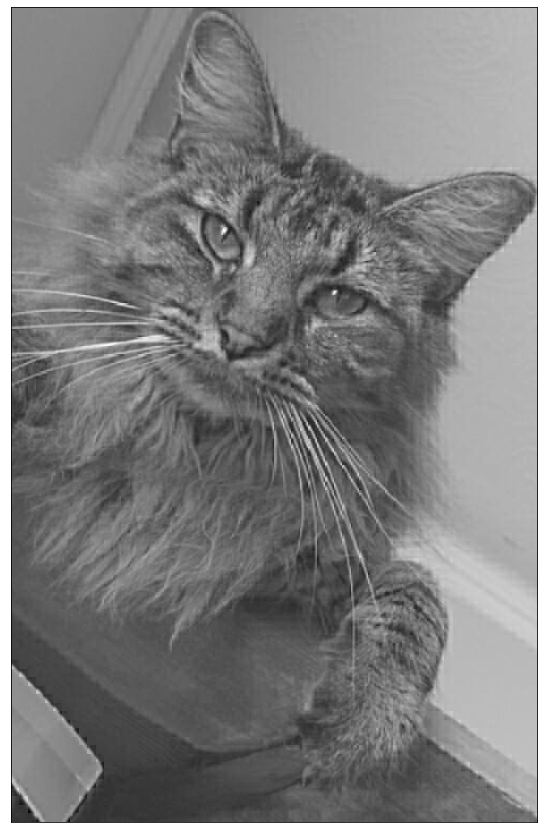

In [115]:
showImage(res)

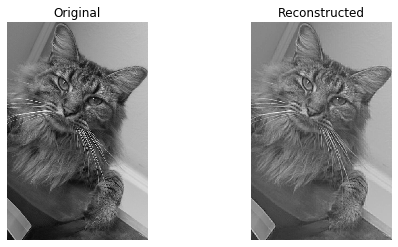

In [116]:
plot_comparison(img,res)

### 4. BONUS: Magnitude and phase of the FFT  

**a)** Load the ```wolf.jpg``` and ```cat.jpg``` images inside the ```PhaseMag``` folder. Use ```im = misc.imresize(im,(100,100))```  to resize the two images such that both have the same size.

**b)** Compute the fft of each image

**c)** Display the centered and logarithmically scaled magnitude of each fft (same as 1.1)

**d)** Compute and display the phase of the fft

**e)** Reconstruct the ```cat``` and the ```wolf``` images only from their **magnitude** (set the phase to 0). Display the result in a logarithmic scale.

**f)** Reconstruct the ```cat``` and the ```wolf``` images only from their **phase** (set the magnitude to 1) 

**g)** Reconstruct an image with the magnitude of the wolf's fft and the phase of the cat's fft. 

**h)** Explain what you observe

**Hints**: You may want use the following functions:
- ```np.abs``` and ```np.angle``` to extract the magnitude and phase of a complex number.
- ```magnitude * np.exp (1j * phase)``` to build a complex number from its magnitude and phase.
- ```np.cos``` and  ```np.sin``` to build a complex number from its real and imaginary part ( $real + 1j*imaginary$)


**h) EXPLANATION**: (FILL IN WITH YOUR ANSWER)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/PhaseMag/wolf.jpg


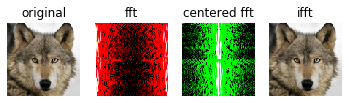

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/PhaseMag/cat.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


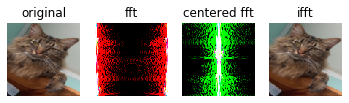

In [54]:
SUBDIR = os.path.join(IMDIR, "PhaseMag")

for root, dirnames, filenames in os.walk(SUBDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            plt.subplot(141)
            im = io.imread(f,as_grey=True)
            im = resize(im,(100,100))
            plt.imshow(im,cmap='gray')
            plt.title('original')
            plt.axis('off')
            
            plt.subplot(142)
            im_fft=np.fft.fft2(im)
            im_fftlog=np.log(np.abs(im_fft))
            plt.imshow(im_fftlog,cmap='gray')
            plt.title('fft')
            plt.axis('off')
            
            plt.subplot(143)
            x=np.fft.fftshift(im_fft)
            im_fftcen=np.log(np.abs(x))
            plt.imshow(im_fftcen,cmap='gray')
            plt.title('centered fft')
            plt.axis('off')
            
            plt.subplot(144)
            im_fftdecen=np.fft.ifftshift(x)
            im_ifft=np.fft.ifft2(im_fftdecen)
            plt.imshow(np.abs(im_ifft),cmap='gray')
            plt.title('ifft')
            plt.axis('off')
            plt.show()

In [69]:
SUBDIR = os.path.join(IMDIR, "PhaseMag")

for root, dirnames, filenames in os.walk(SUBDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            plt.subplot(141)
            im = io.imread(f,as_grey=True)
            im = resize(im,(100,100))
            plt.imshow(im,cmap='gray')
            plt.title('original')
            plt.axis('off')
            
            F = np.fft.fft2(im)
            F_Mag = np.abs(F)
            F_Phase = np.exp(1j*np.angle(F))
            # reconstruction
            I_Mag = np.fft.ifft2(np.log(F_Mag+1))
            I_Phase = np.fft.ifft2(F_Phase)
            # Calculate limits for plotting
            I_Mag_min = min(np.abs(I_Mag))
            I_Mag_max = max(np.abs(I_Mag))
            I_Phase_min = min(np.abs(I_Phase)
            I_Phase_max = max(np.abs(I_Phase)
            # Display reconstructed images
#             plt.subplot(142)
#             plt.imshow(abs(I_Mag))
#             plt.title('reconstructed image only by Magnitude')
#             plt.subplot(143)
#             plt.imshow(abs(I_Phase) 
#             plt.title('reconstructed image only by Phase')

SyntaxError: unexpected EOF while parsing (<ipython-input-69-78adeb34716c>, line 33)

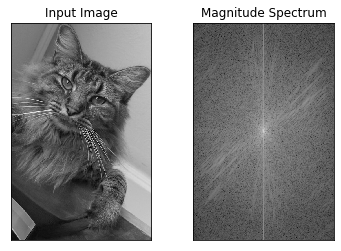

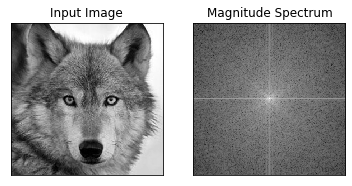

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/PhaseMag/cat.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()   


img1 = cv2.imread('/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/PhaseMag/wolf.jpg',0)
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20*np.log(np.abs(fshift1))

plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()   

In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('/Users/chaitanyaviriyala/Documents/DataSim/frequency_domain/Archive/PhaseMag/cat.jpg',0)
F = np.fft.fft2(im)
F_Mag = np.abs(F)
F_Phase = np.exp(1j*np.angle(F))
# reconstruction
I_Mag = np.fft.ifft2(np.log(F_Mag+1))
I_Phase = np.fft.ifft2(F_Phase)
print(I_Mag.shape)
# Calculate limits for plotting
I_Mag_min = min(np.abs(I_Mag))
# I_Mag_max = max(np.abs(I_Mag))
# I_Phase_min = min(np.abs(I_Phase)
# I_Phase_max = max(np.abs(I_Phase)

(773, 500)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()